<a href="https://colab.research.google.com/github/prajwalgotmare/Lego_Minifigure_Face_Detection/blob/main/Lego_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing all the required libraries

In [5]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Unzipping the file and saving it in Lego_Faces Folder

In [4]:
import zipfile

zip_file_path = "/content/Lego Minifigure Faces.zip"
extract_folder_path = "/content/Lego_Faces"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

## Displaying one of the files Using Python Imaging Library.

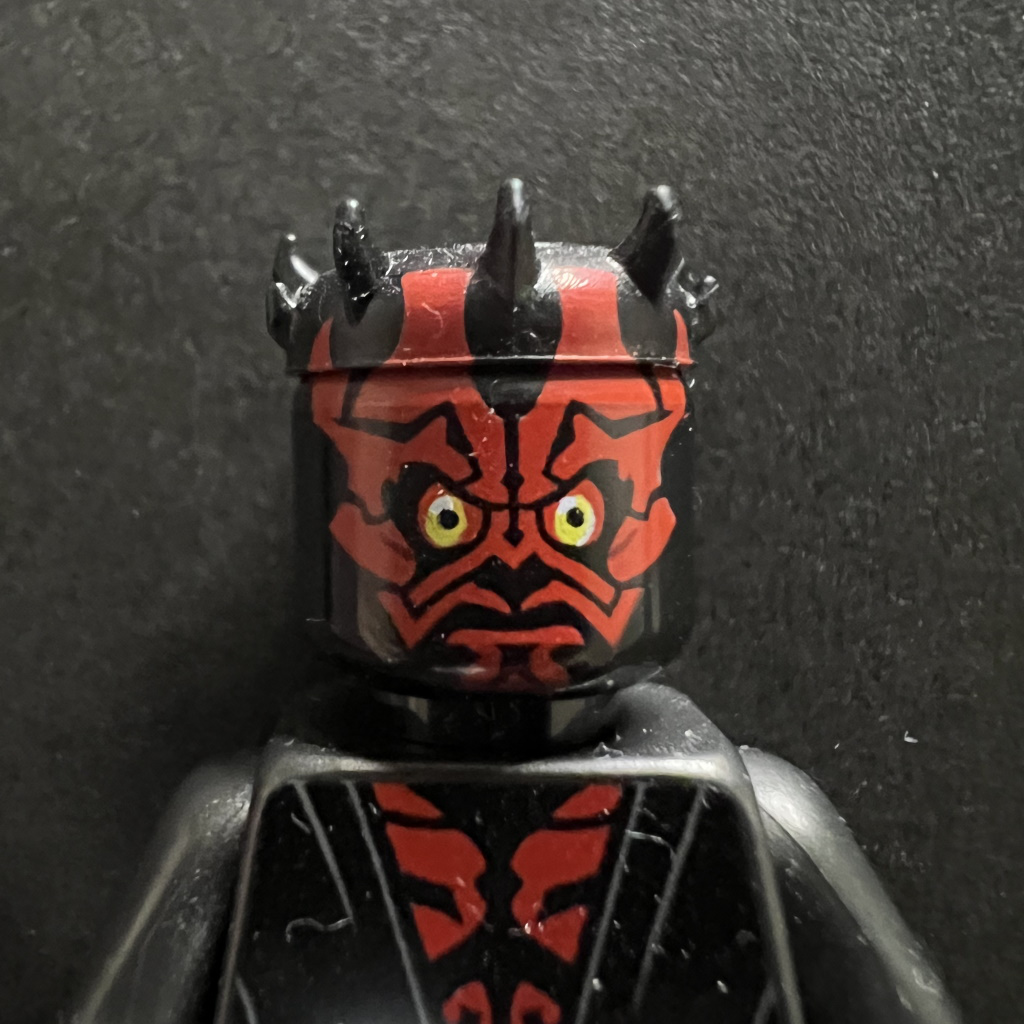

In [22]:
from PIL import Image

# open image
img = Image.open("/content/Lego_Faces/00/0001.jpg")

# show image
img.show()


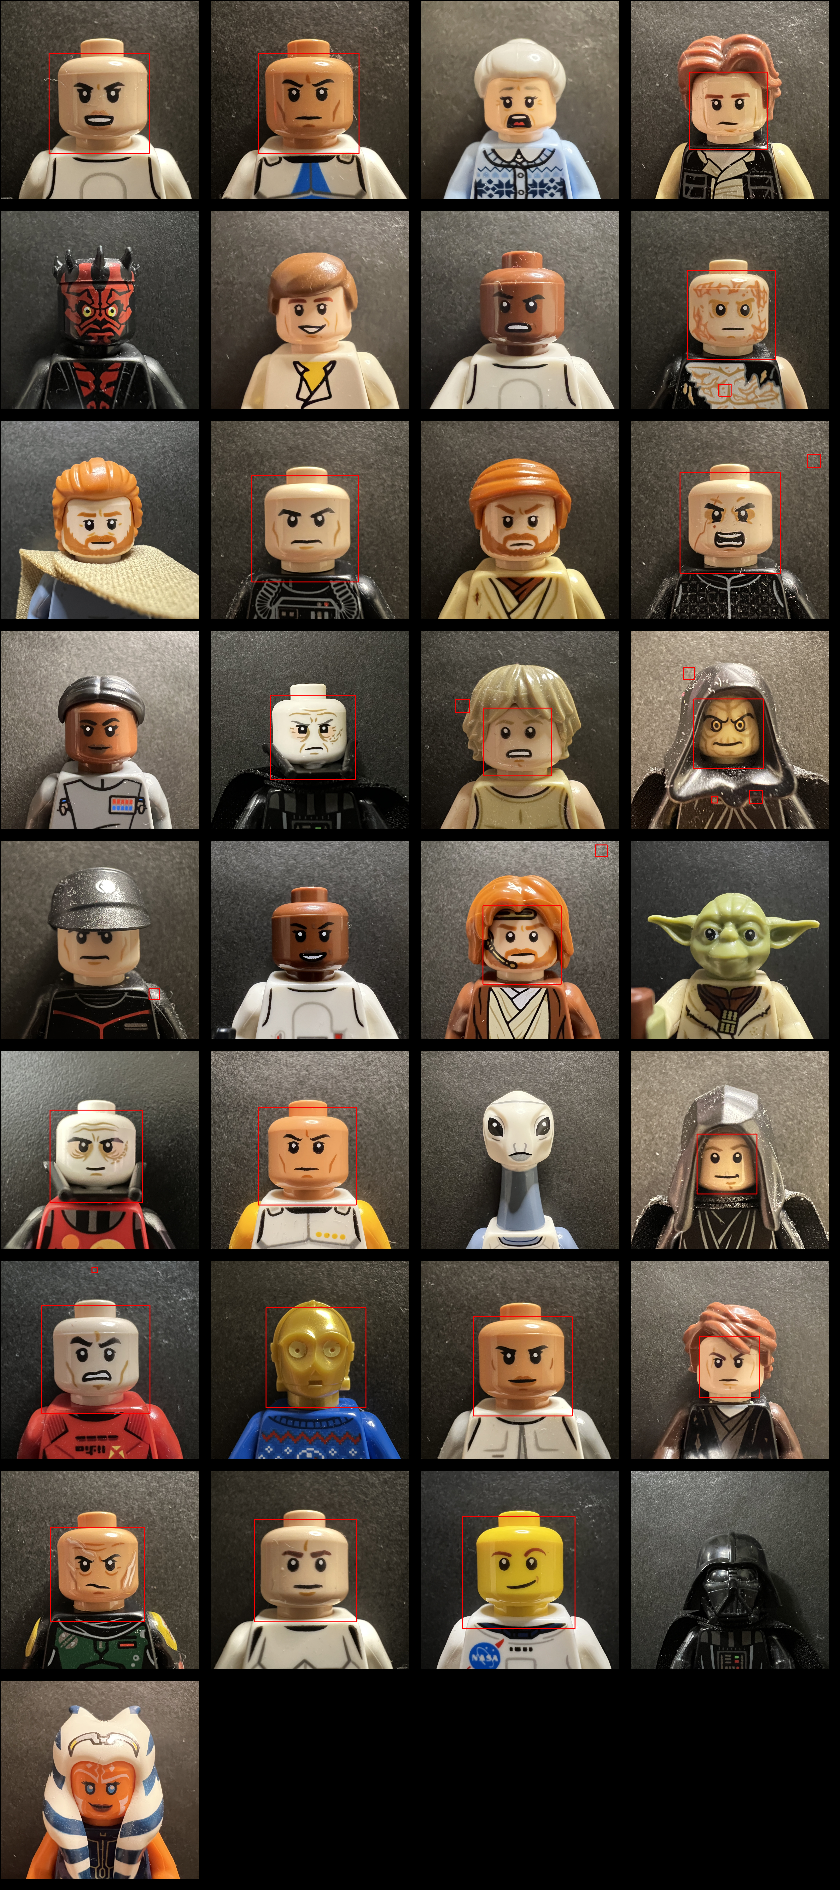

In [21]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# set output directory
output_folder = 'output/'

# create output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# define grid properties
num_cols = 4
grid_spacing = 10
grid_width = 200
grid_height = 200

# initialize output grid
num_rows = int(np.ceil(33 / num_cols))
grid = np.zeros((num_rows*(grid_height+grid_spacing), num_cols*(grid_width+grid_spacing), 3), dtype=np.uint8)

# loop over all image files in the input folder
for i, file in enumerate(os.listdir('/content/Lego_Faces/00')):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        # load input image
        img_path = os.path.join('/content/Lego_Faces/00', file)
        img = cv2.imread(img_path)

        if img is None:
            print(f'Error: Failed to load image file at {img_path}')
            continue

        # convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # detect faces in the image
        faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

        # loop over the detected faces and draw rectangles around them
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)

        # resize image to fit in grid
        img = cv2.resize(img, (grid_width-2, grid_height-2))

        # add image to output grid
        col = i % num_cols
        row = i // num_cols
        x = col * (grid_width + grid_spacing)
        y = row * (grid_height + grid_spacing)
        grid[y+1:y+grid_height-1, x+1:x+grid_width-1] = img

# display the output grid
cv2_imshow(grid)
cv2.waitKey(0)
cv2.destroyAllWindows()
